The following notebook contains the code that was written by our team, Ayush Shenvi Pissurlenkar and Yousuf Khan, to create our RNN model to classify languages

In [36]:
# Imports
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from nltk import word_tokenize
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Input, Dense, Embedding, GlobalMaxPool1D
from keras.models import Sequential
from keras.utils import pad_sequences
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer

## Data Preperation
Ensure that the `testDataSet_train.csv` is in the same folder as this notebook so that pandas can load the data into a dataframe

In [2]:
df = pd.read_csv('testDataSet_train.csv')

In [3]:
data = df['text'].map(word_tokenize).values
total_vocabulary = set(word for doc in data for word in doc)  # set created from nested comprehension 
print('There are {} unique words in the dataset.'.format(len(total_vocabulary)))
print('There are {} unique documents in the dataset.'.format(len(data)))

There are 1360372 unique words in the dataset.
There are 4200 unique documents in the dataset.


In [5]:
# set the langauge as our target classifier
target = df['langauage']

# use one hot encoding since our target is categorical
y = pd.get_dummies(target).values

# use keras to create a Tokenizer object
tokenizer = text.Tokenizer(num_words=1370000)  # limit to the num_words most important ones
tokenizer.fit_on_texts(list(df['text']))
tokenized_texts = tokenizer.texts_to_sequences(df['text'])

In [6]:
X = pad_sequences(tokenized_texts, maxlen=50000) # pad sequences so that all entries in the dataframe as the same length

#### We have decided to stick with the normal 80/20 split where 80% of the data is for training and 20% is for testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

embedding_size = 128

model = Sequential([
  Embedding(len(total_vocabulary), embedding_size),
  tf.keras.layers.GRU(25, return_sequences=True),
  GlobalMaxPool1D(),
  Dense(21, activation='softmax')
])

Now that the model is built with its necesary layers, compile it

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [11]:
model.summary() # check the shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         174127616 
                                                                 
 gru (GRU)                   (None, None, 25)          11625     
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 21)                546       
                                                                 
Total params: 174,139,787
Trainable params: 174,139,787
Non-trainable params: 0
_________________________________________________________________


In [12]:
steps_per_epoch = len(X_train)//embedding_size  # Number of batches per epoch

#### Here we only run two epochs as a testing measure to ensure that the model would produce a favorable result

In [13]:
model.fit(X_train, y_train, epochs=2, batch_size=32, steps_per_epoch=steps_per_epoch, validation_split=0.1)

Epoch 1/2
26/26 [==============================] - 8816s 340s/step - loss: 2.9592 - accuracy: 0.2163 - val_loss: 2.8339 - val_accuracy: 0.5446
Epoch 2/2
26/26 [==============================] - 8182s 312s/step - loss: 2.6870 - accuracy: 0.7055 - val_loss: 2.4834 - val_accuracy: 0.7976


In [16]:
# save the model to disk
filename = 'rnn_model.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\embedding
......vars
.........0
...layers\global_max_pooling1d
......vars
...layers\gru
......vars
...layers\gru\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-11 11:22:28         2384
metadata.json                                  2022-12-11 11:22:28           64
variables.h5                                   2022-12-11 11:22:33   2089703204


#### Now that we know the model works, we train another 8 epochs for a total of 10 to determine how high the accuracy can reach

In [17]:
model.fit(X_train, y_train, epochs=8, batch_size=32, steps_per_epoch=steps_per_epoch, validation_split=0.1)

Epoch 1/8
26/26 [==============================] - 8380s 322s/step - loss: 2.3024 - accuracy: 0.8474 - val_loss: 2.0293 - val_accuracy: 0.8780
Epoch 2/8
26/26 [==============================] - 8354s 319s/step - loss: 1.8330 - accuracy: 0.8774 - val_loss: 1.5604 - val_accuracy: 0.8929
Epoch 3/8
26/26 [==============================] - 18529s 728s/step - loss: 1.3706 - accuracy: 0.9243 - val_loss: 1.1436 - val_accuracy: 0.9673
Epoch 4/8
26/26 [==============================] - 9457s 362s/step - loss: 0.9689 - accuracy: 0.9804 - val_loss: 0.8141 - val_accuracy: 0.9732
Epoch 5/8
26/26 [==============================] - 8758s 336s/step - loss: 0.6635 - accuracy: 0.9796 - val_loss: 0.5755 - val_accuracy: 0.9732
Epoch 6/8
26/26 [==============================] - 8269s 318s/step - loss: 0.4531 - accuracy: 0.9928 - val_loss: 0.4319 - val_accuracy: 0.9762
Epoch 7/8
26/26 [==============================] - 20428s 804s/step - loss: 0.3541 - accuracy: 0.9904 - val_loss: 0.3426 - val_accuracy: 0.97

In [18]:
# save the model to disk
filename = 'rnn_model_fullTrain.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\embedding
......vars
.........0
...layers\global_max_pooling1d
......vars
...layers\gru
......vars
...layers\gru\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-12 12:40:11         2384
metadata.json                                  2022-12-12 12:40:11           64
variables.h5                                   2022-12-12 12:40:15   2089703204


In [31]:
y_pred = model.predict(X_test)

27/27 [==============================] - 118s 4s/step


In [ ]:
y_pred=np.argmax(y_pred, axis=1) # Need to adjust the dimensions of the data to allow for the confusion matrix to be generated
y_test=np.argmax(y_test, axis=1)

In [33]:
cm = confusion_matrix(y_test, y_pred) # Generate a confusion matrix to get classification report out of it

In [34]:
print(accuracy_score(y_test, y_pred))

0.9916666666666667


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       1.00      0.97      0.99        38
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        44
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        43
           8       1.00      0.98      0.99        45
           9       1.00      1.00      1.00        39
          10       0.97      0.97      0.97        31
          11       1.00      1.00      1.00        41
          12       1.00      0.97      0.99        35
          13       1.00      0.95      0.97        39
          14       1.00      1.00      1.00        41
          15       0.91      1.00      0.95        29
          16       1.00      1.00      1.00        47
          17       0.98    

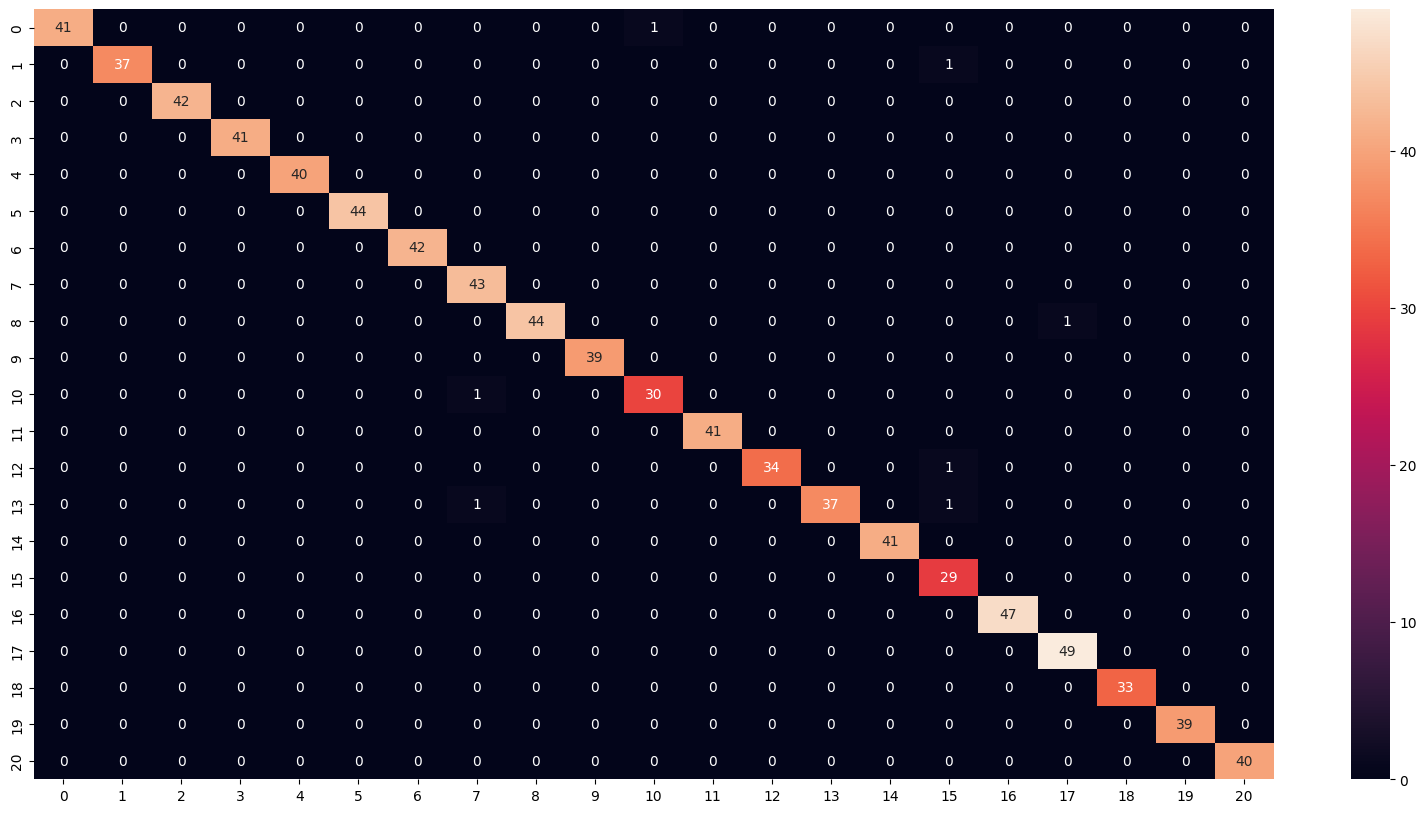

In [38]:
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True)
plt.show()